In [50]:
data = [
           {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne', 'class':'middle'},
           {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont',  'class':'lower'},
           {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford',  'class':'upper'},
           {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont',  'class':'middle'}
       ]

#### Categorical information - Need to convert them into numbers

In [51]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False,dtype=int)
#created a transformer - which converts data from one format to another

In [52]:
data_trans = vec.fit_transform(data)

In [53]:
data_trans
#neighbourhood is expanded into 3 different columns -0,1,2

array([[     0,      1,      0,      0,      1,      0, 850000,      4],
       [     1,      0,      0,      1,      0,      0, 700000,      3],
       [     0,      0,      1,      0,      0,      1, 650000,      3],
       [     0,      1,      0,      1,      0,      0, 600000,      2]], dtype=int32)

In [54]:
vec.feature_names_

['class=lower',
 'class=middle',
 'class=upper',
 'neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

### Text Feature

In [22]:
sample = ['problem of evil evil',
         'evil queen',
         'horizon problem']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)

In [24]:
X
# Sparse matrix, containing number of times each word appears

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [25]:
import pandas as pd

In [26]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,2,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


### Image Processing 

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

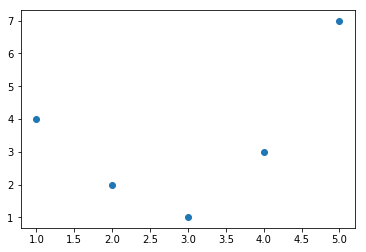

In [30]:
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X = x[:,np.newaxis]

In [34]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [35]:
model = LinearRegression()

In [36]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
yfit = model.predict(X)

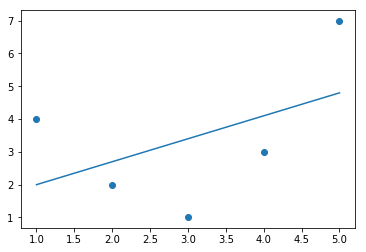

In [40]:
plt.scatter(X,y) #showing the points
plt.plot(X,yfit) #line touching all points

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [43]:
X2 = poly.fit_transform(X)
X2

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.]])

In [44]:
model = LinearRegression()
model.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
yfit = model.predict(X2)

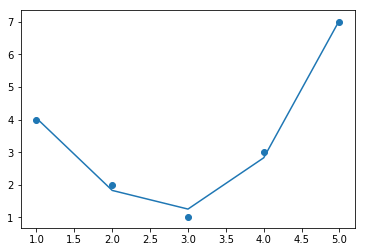

In [47]:
plt.scatter(x,y)
plt.plot(x,yfit)

### Imputation of Missing Data
* Filling the missing data is known as imputation

In [56]:
import numpy as np
from numpy import nan

In [57]:
X = np.array([[nan, 0,3],
              [3,7,9],
              [3,5,2],
              [4,nan,6],
              [8,8,1]
             ])

In [58]:
y = np.array([14,16,-1,8,-5])

In [60]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')

In [61]:
X2 = imp.fit_transform(X)

In [62]:
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

In [63]:
help(Imputer)

Help on class Imputer in module sklearn.preprocessing.imputation:

class Imputer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <imputation>`.
 |  
 |  Parameters
 |  ----------
 |  missing_values : integer or "NaN", optional (default="NaN")
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For missing values encoded as np.nan,
 |      use the string value "NaN".
 |  
 |  strategy : string, optional (default="mean")
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using the mean along
 |        the axis.
 |      - If "median", then replace missing values using the median along
 |        the axis.
 |      - If "most_frequent", then replace missing using the most frequent
 |        value along the axis.
 |  
 |  axis : integer, optional (default=0)
 |      The axis along which to i

### Feature Pipelines
* Doing tranformations manually becomes tedious
* We want to create a pipeline, which automates the entire thing - impute missing values, transform features, fit linear regression

In [64]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'), PolynomialFeatures(degree=2), LinearRegression()  )

In [65]:
model.fit(X,y)

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [66]:
model.predict(X)

array([ 14.,  16.,  -1.,   8.,  -5.])